In [1]:
'''%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = cat_df_flights['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()'''

'%matplotlib inline\nimport seaborn as sns\nimport matplotlib.pyplot as plt\ncarrier_count = cat_df_flights[\'carrier\'].value_counts()\nsns.set(style="darkgrid")\nsns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)\nplt.title(\'Frequency Distribution of Carriers\')\nplt.ylabel(\'Number of Occurrences\', fontsize=12)\nplt.xlabel(\'Carrier\', fontsize=12)\nplt.show()'

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras import datasets, layers, models, regularizers, initializers
from skimage.io import imshow
from skimage.transform import rotate
from skimage.filters.edges import convolve

from skimage.io import imshow, imread
from skimage.transform import resize
from skimage.color import rgb2gray

np.random.seed(33)

In [2]:
df = pd.read_csv('data/labels_df.csv')

In [3]:
loaded = np.load('data/image_array.npz')
all_img = loaded['a']
bw_img = loaded['b']

In [4]:
labels = df.masterCategory.copy()
labels = labels.astype('category')
labels = labels.cat.codes

In [5]:
masterCat_dict = {}
for i in range(len(labels.value_counts().index)):
    s = labels.value_counts().index[i]
    t = df.masterCategory.value_counts().index[i]
    masterCat_dict[t] = s
masterCat_dict    

{'Apparel': 1,
 'Accessories': 0,
 'Footwear': 2,
 'Personal Care': 5,
 'Free Items': 3,
 'Sporting Goods': 6,
 'Home': 4}

In [6]:
#shuffle images and target var
shuffle = np.random.choice( np.arange(len(bw_img)), size=len(bw_img), replace=False)
X = [bw_img[ix] for ix in shuffle]
y = labels.values[shuffle]

#at end, use this to view images in color
colorX = [all_img[ix] for ix in shuffle]

In [79]:
round(len(X)*.75)

32990

In [81]:
X_train = X[:32990]
X_test = 

In [45]:
original = [X[ix] for ix in shuffle.argsort()]

In [8]:
len(original_index)

43987

In [51]:
shuffled_idx_accessories_false_negs = np.array(shuffled_idx_accessories_false_negs)

In [60]:
shuffle[shuffled_idx_accessories_false_negs]

array([27349, 34282,   533,  1312,  9546,  4301, 22622, 13588, 19057,
        2341, 32477, 39402,  5095, 14977, 36307, 22702,  1723, 20373,
       12500, 11415,  3860,  9157, 37841, 13815, 22452, 11788, 42155,
       42025,  3180, 31259, 20706, 24779, 12467, 24165,  7680,  8475,
       43365, 11254, 40605, 30940, 35091, 29978, 27438,  9162, 33503,
       29554, 14147,  1788])

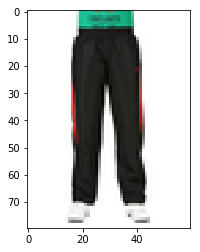

In [61]:
plt.imshow( all_img[27349].reshape(80,60,3)/255)

In [62]:
df.iloc[27349,:]

id                                       1605
gender                                  Women
masterCategory                        Apparel
subCategory                        Bottomwear
articleType                       Track Pants
baseColour                              Black
season                                   Fall
year                                     2010
usage                                  Sports
productDisplayName    Reebok Black Track Pant
Name: 27349, dtype: object

In [9]:
shuffle.argsort()

array([41743, 27448, 16113, ..., 21078, 26759, 31274])

In [10]:
a = np.array(['a','b','c','d','e','f','g'])

In [11]:
shuf = np.random.choice( np.arange(len(a)), size=len(a), replace=False)

In [12]:
shuf

array([2, 3, 6, 0, 1, 5, 4])

In [13]:
b = [a[ix] for ix in shuf]
b

['c', 'd', 'g', 'a', 'b', 'f', 'e']

In [46]:
d = shuf[0:3].argsort()

In [47]:
c = [b[ix] for ix in d]

In [48]:
c

['c', 'd', 'g']

In [17]:
len(X), len(y)

(43987, 43987)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve, roc_curve

In [66]:
X_train, X_test, y_train, y_test, all_img_train, all_img_test = train_test_split(X, y, df)

In [65]:
#clf = RandomForestClassifier(n_estimators = 100, random_state=33)

In [21]:
#clf.fit(X_train, y_train)

In [22]:
# import dill as pickle
# with open('random_forest.pkl', 'wb') as my_pickle:
#     pickle.dump(clf, my_pickle)

In [67]:
import dill as pickle
with open('random_forest.pkl', 'rb') as model:
    clf = pickle.load(model)

In [68]:
yhat = clf.predict(X_test)
print( accuracy_score(y_test, yhat) )

0.994543966536328


In [69]:
yproba = clf.predict_proba(X_test)

In [70]:
recall_score(y_test, yhat, average='weighted')

0.994543966536328

In [71]:
recall_score(y_test, yhat, average='micro')

0.994543966536328

In [72]:
wrong_id_list = []
pred_cat_list = []
real_cat_list = []
for row_idx in range(len(y_test)):
    if y_test[row_idx]!=yhat[row_idx]:
        wrong_id_list.append(row_idx)
        pred_cat_list.append(yhat[row_idx])
        real_cat_list.append(y_test[row_idx])

arr = np.array([pred_cat_list, real_cat_list])
arr = arr.transpose()

In [73]:
wrong_df = pd.DataFrame( arr, index= wrong_id_list, columns = ['predicted', 'actual'] )
wrong_df.head()

,predicted,actual
181,1,0
434,0,1
819,1,0
857,0,1
1261,0,5


In [74]:
'''{'Apparel': 1,
 'Accessories': 0,
 'Footwear': 2,
 'Personal Care': 5,
 'Free Items': 3,
 'Sporting Goods': 6,
 'Home': 4}
'''
wrong_accessories = wrong_df[wrong_df.actual == 0]
wrong_apparel = wrong_df[wrong_df.actual == 1]
wrong_footwear = wrong_df[wrong_df.actual == 2]
wrong_personal = wrong_df[wrong_df.actual == 5]
wrong_free = wrong_df[wrong_df.actual == 3]
wrong_home = wrong_df[wrong_df.actual == 4]
wrong_sport = wrong_df[wrong_df.actual == 6]
print( len(wrong_accessories), len(wrong_apparel), len(wrong_footwear), len(wrong_free), len(wrong_personal), len(wrong_sport))

23 7 3 5 20 2


In [75]:
wrong_accessories.head(10)

,predicted,actual
181,1,0
819,1,0
1770,1,0
2275,1,0
2606,1,0
2703,1,0
3349,1,0
3527,1,0
3743,1,0
4043,1,0


In [37]:
shuffled_idx_accessories_false_negs = list(wrong_accessories.index)

In [38]:
precision, recall, thresholds = precision_recall_curve(y_test, yproba[:,1], pos_label=1)

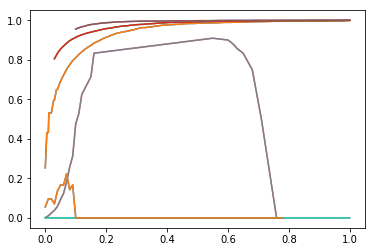

In [39]:
# Funny looking, but not particularly useful
precision_list = []
recall_list = []
thresh_list = []
for i in range(6):
    p, r, t = precision_recall_curve(y_test, yproba[:,i], pos_label=i)
    precision_list.append(p[:-1])
    recall_list.append(r[:-1])
    thresh_list.append(t)
    #print(p.shape)
    #print(t.shape)
    plt.plot( thresh_list[i], precision_list[i])
    plt.plot( thresh_list[i], precision_list[i])


KeyError: 181

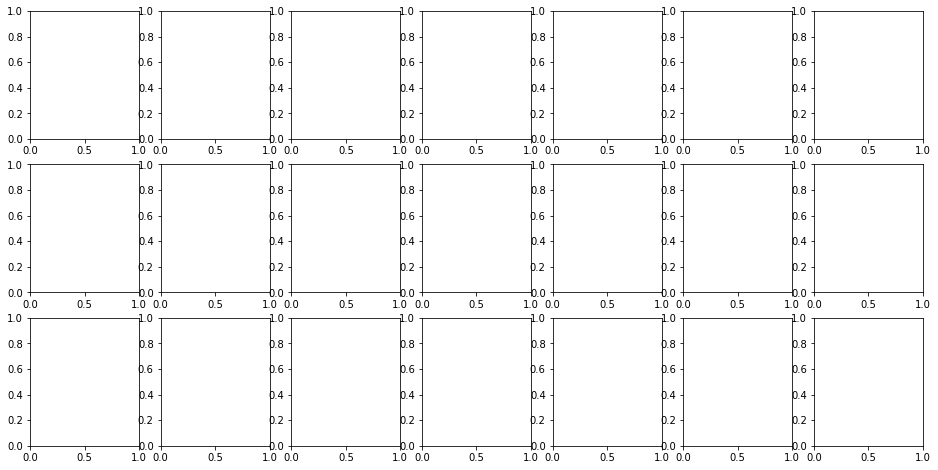

In [77]:
fig, axs = plt.subplots(3, 7, figsize=(16,8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow( all_img_test[wrong_accessories.index[i]].reshape(80,60,3)/255 )
    #print(topwear_idx[i])
    ax.set_xticks([])
    ax.set_yticks([]);

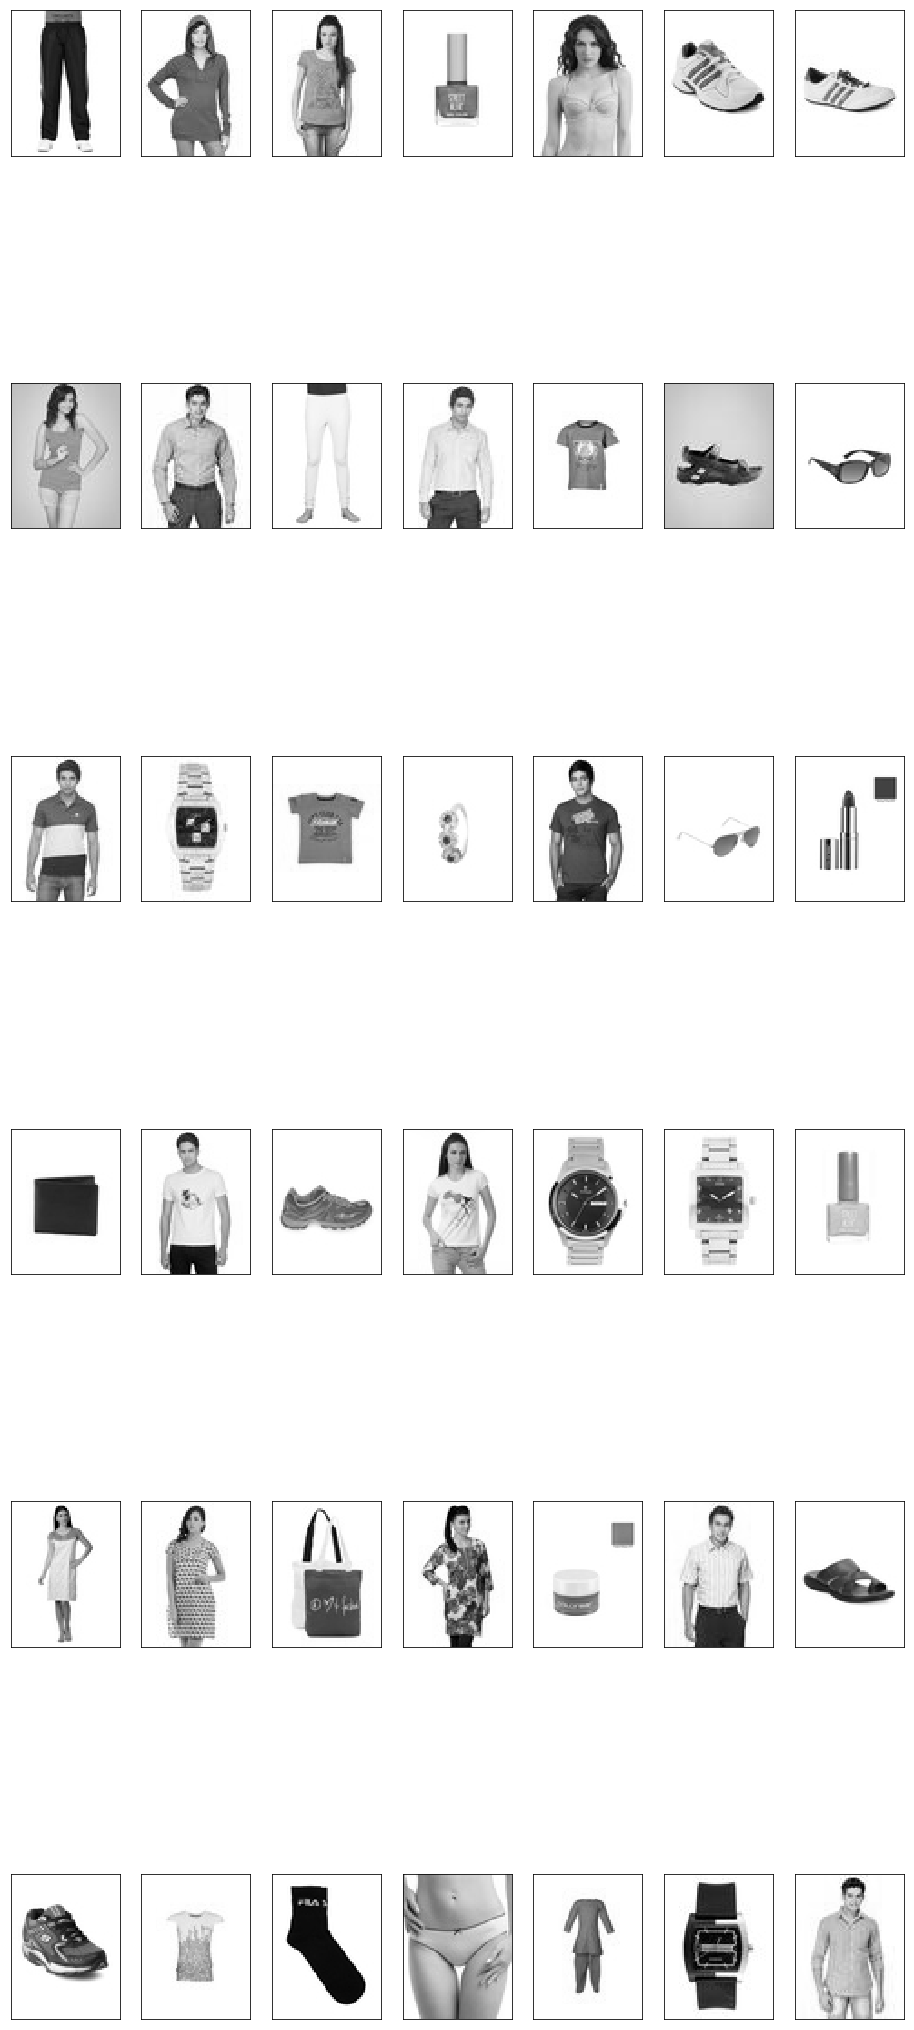

In [59]:
fig, axs = plt.subplots(6, 7, figsize=(16,40))
for i, ax in enumerate(axs.flatten()):
    image = X[wrong_accessories.index[i]].reshape(80,60,1)*[1,1,1]/255
    ax.imshow( image )
    #print(topwear_idx[i])
    ax.set_xticks([])
    ax.set_yticks([]);